# Importação

In [66]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

#Autocorrelação
from pandas.plotting import autocorrelation_plot

#Statsmodels


# Funções

In [12]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(14,6)
    ax.set_title(titulo, loc='left', fontsize=20)
    ax.set_xlabel(labelx, fontsize=16)
    ax.set_ylabel(labely, fontsize=16)
    ax = ax

In [13]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo, subtitulo1, subtitulo2, subtitulo3):
    plt.figure(figsize=(16, 12))
    plt.suptitle(titulo, fontsize=20)

    ax = plt.subplot(3, 1, 1)
    ax.set_title(subtitulo1, fontsize=15, loc='left')
    ax = sns.lineplot(x=x, y=y1, data=dataset)

    plt.subplot(3,1,2)
    ax = sns.lineplot(x=x, y=y2, data=dataset)
    ax.set_title(subtitulo2, fontsize=15, loc='left')

    plt.subplot(3,1,3)
    ax = sns.lineplot(x=x, y=y3, data=dataset)
    ax.set_title(subtitulo3, fontsize=15, loc='left')
    
    

# Customização Gráficos

In [25]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

# Analisando as vendas

In [3]:
alucar = pd.read_csv('alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [5]:
print(f'Quantidade de dados nulos: {alucar.isna().sum().sum()}' )

Quantidade de dados nulos: 0


In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar.mes = pd.to_datetime(alucar.mes)

In [8]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<AxesSubplot:xlabel='mes', ylabel='vendas'>

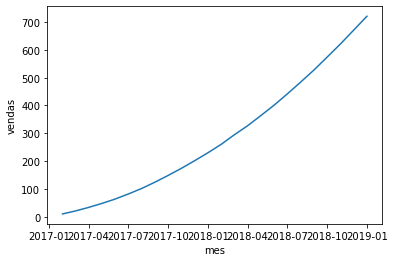

In [9]:
sns.lineplot(x='mes', y='vendas', data=alucar)

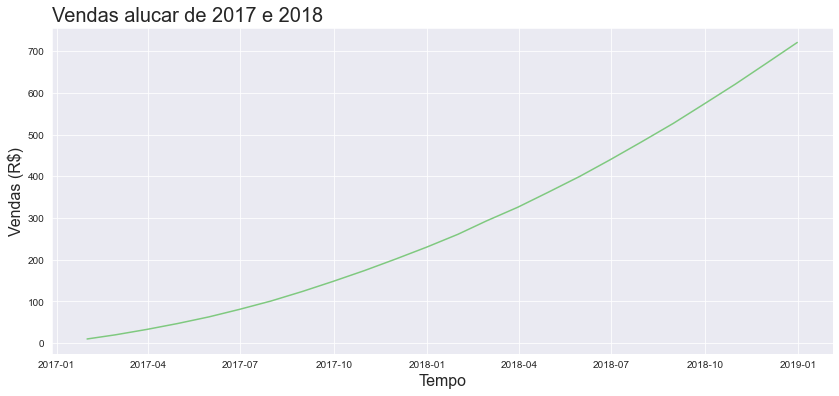

In [10]:
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(14,6)
ax.set_title('Vendas alucar de 2017 e 2018', loc='left', fontsize=20)
ax.set_xlabel('Tempo', fontsize=16)
ax.set_ylabel('Vendas (R$)', fontsize=16)
ax = ax

In [11]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [12]:
alucar['aumento'] = alucar["vendas"].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


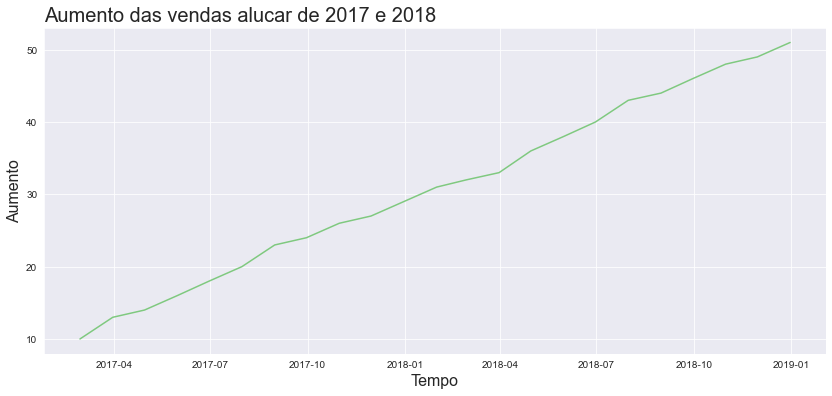

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(14,6)
ax.set_title('Aumento das vendas alucar de 2017 e 2018', loc='left', fontsize=20)
ax.set_xlabel('Tempo', fontsize=16)
ax.set_ylabel('Aumento', fontsize=16)
ax = ax

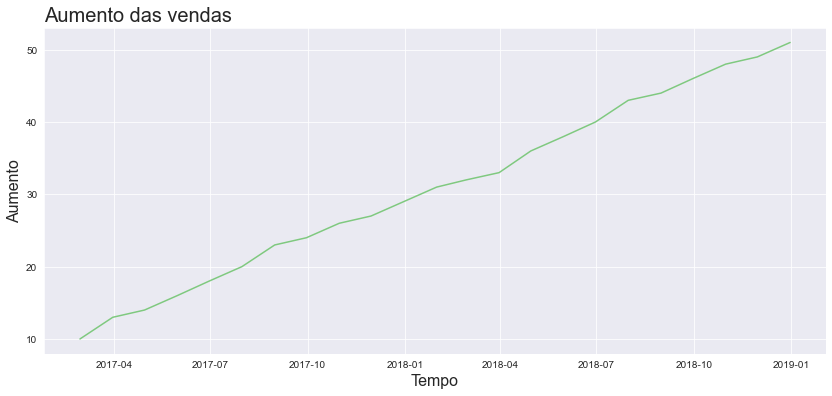

In [15]:
plotar("Aumento das vendas", 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [16]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


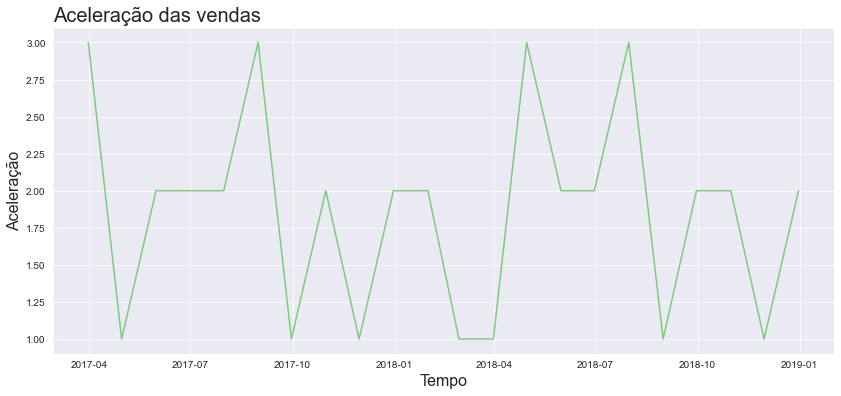

In [17]:
plotar("Aceleração das vendas", 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

Text(0.0, 1.0, 'Aceleração')

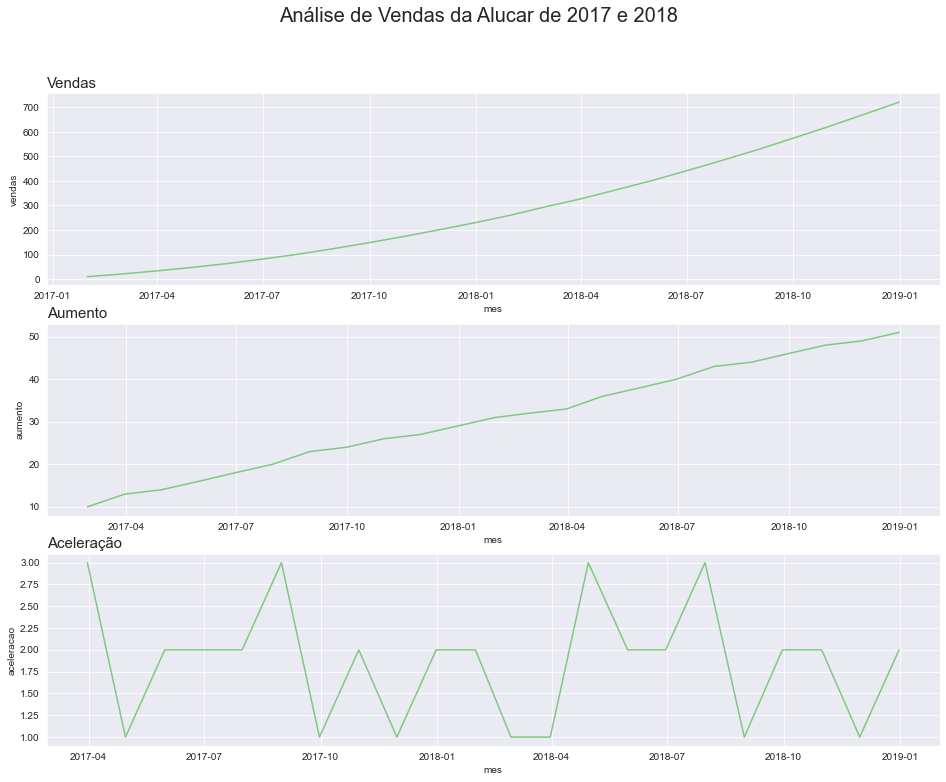

In [87]:
plt.figure(figsize=(16, 12))
plt.suptitle('Análise de Vendas da Alucar de 2017 e 2018', fontsize=20)

ax = plt.subplot(3, 1, 1)
ax.set_title('Vendas', fontsize=15, loc='left')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)

plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.set_title('Aumento', fontsize=15, loc='left')

plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax.set_title('Aceleração', fontsize=15, loc='left')

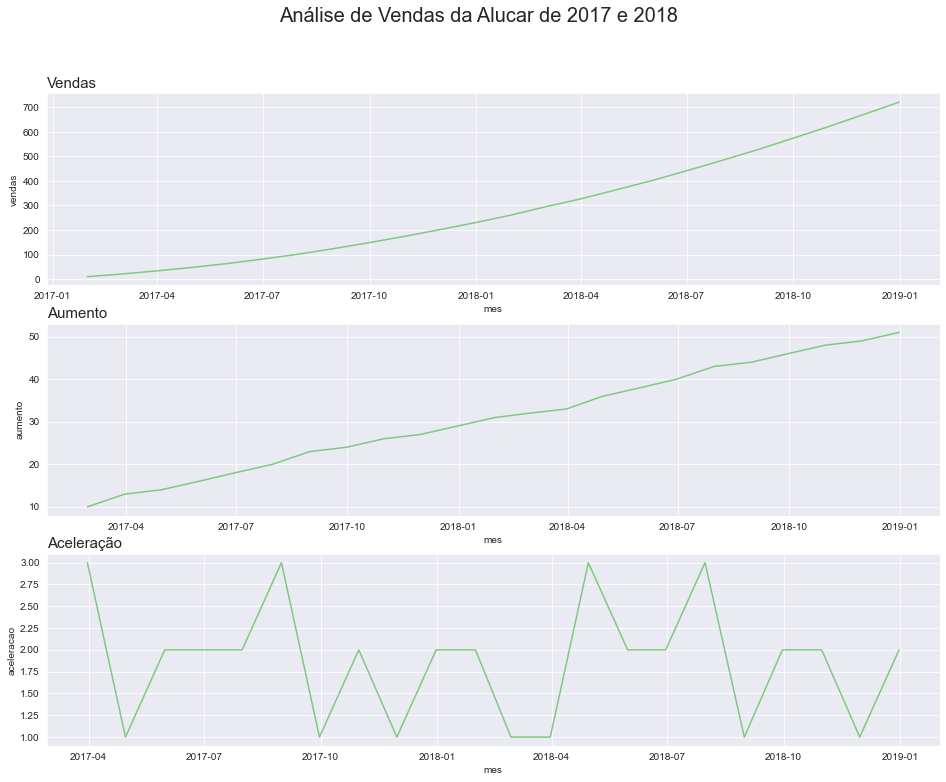

In [92]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, "Análise de Vendas da Alucar de 2017 e 2018", 'Vendas', 'Aumento', 'Aceleração')


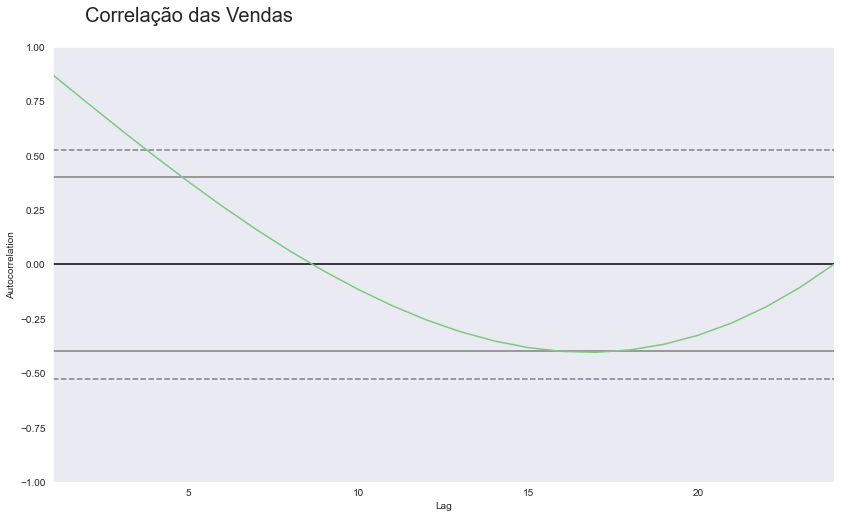

In [99]:
ax = plt.figure(figsize=(14,8))
ax.suptitle('Correlação das Vendas', fontsize=20, x=0.26, y=0.95)
ax = autocorrelation_plot(alucar['vendas'])

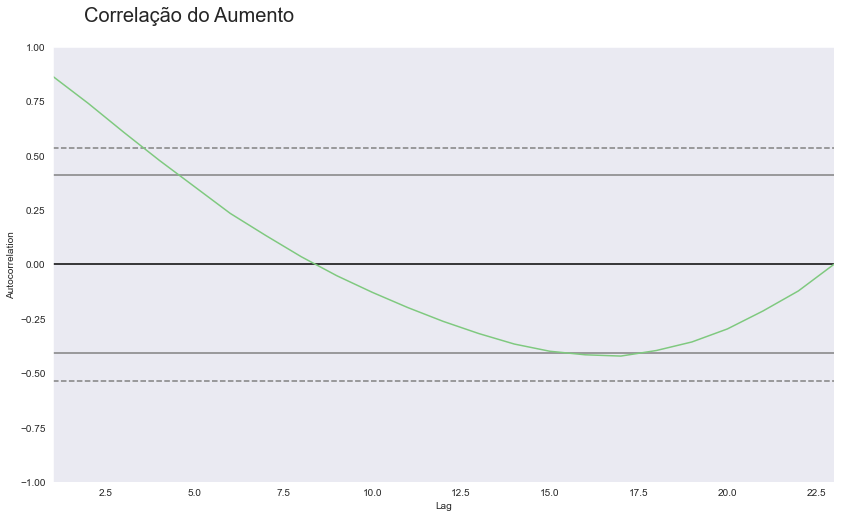

In [103]:
ax = plt.figure(figsize=(14,8))
ax.suptitle('Correlação do Aumento', fontsize=20, x=0.26, y=0.95)
ax = autocorrelation_plot(alucar['aumento'][1:])

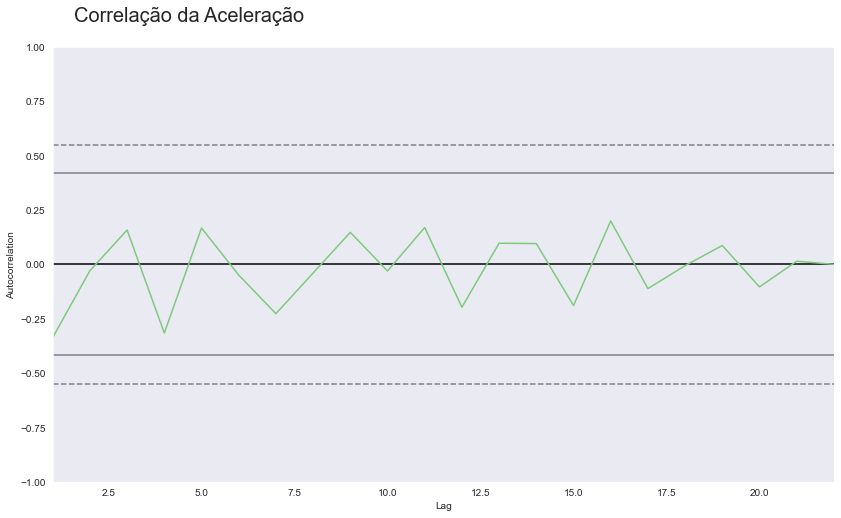

In [104]:
ax = plt.figure(figsize=(14,8))
ax.suptitle('Correlação da Aceleração', fontsize=20, x=0.26, y=0.95)
ax = autocorrelation_plot(alucar['aceleracao'][2:])

# Alucar - Analisando assinantes da newsletter

In [4]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [5]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [9]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [10]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [7]:
print(assinantes.shape)
print(assinantes.isna().sum().sum())


(24, 2)
0


Esse dataset tem 24 linhas e 2 colunas e não possuí dados nulos

In [11]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


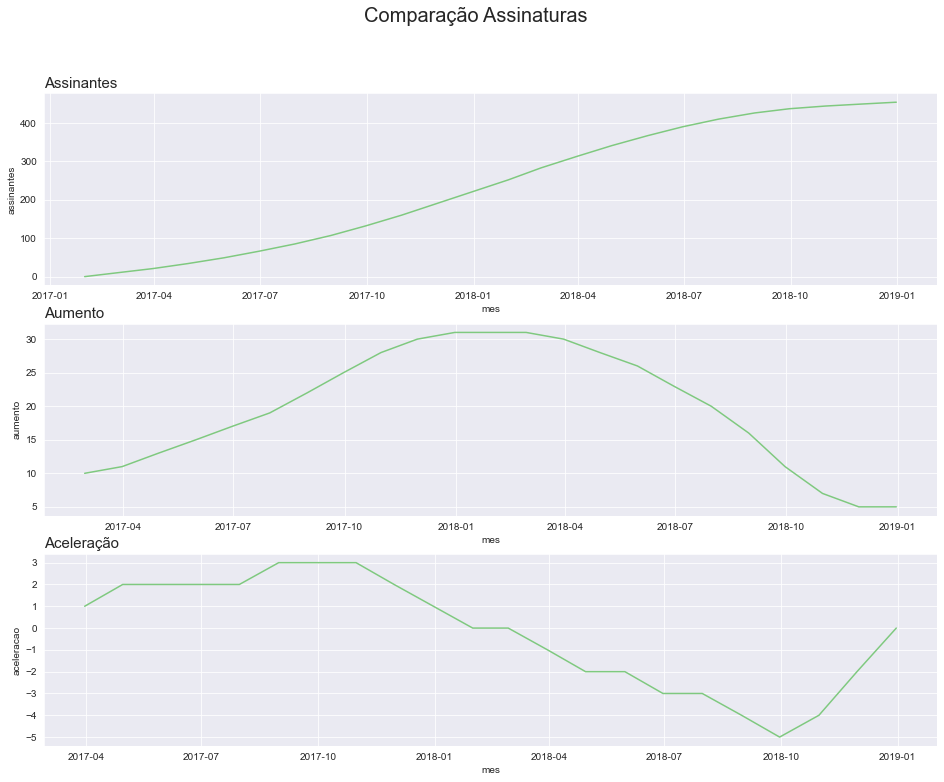

In [26]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Comparação Assinaturas', 'Assinantes', 'Aumento', 'Aceleração')

# Chocolura - Analisando as vendas

In [16]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [17]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [19]:
chocolura['mes'] = pd.to_datetime(chocolura.mes)
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [21]:
print(chocolura.shape)
print(chocolura.isna().sum().sum())

(24, 2)
0


O dataset possuí 24 linhas e 2 colunas e não possuí dados nulos

In [22]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


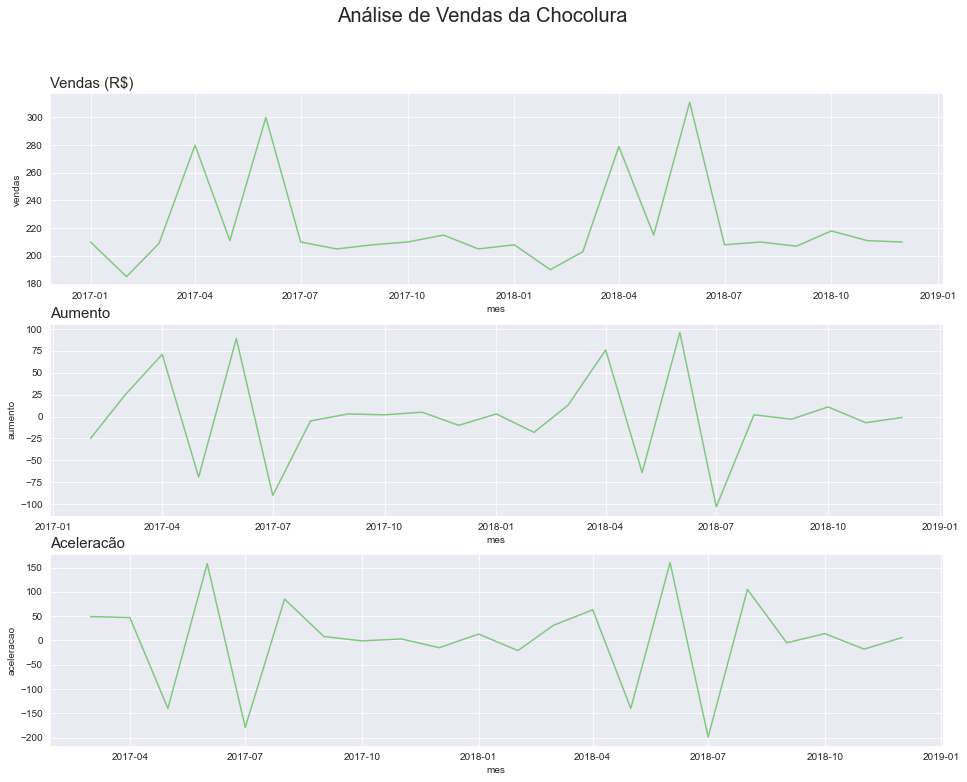

In [27]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de Vendas da Chocolura', 'Vendas (R$)', 'Aumento', 'Aceleracão')

Podemos perceber uma sazonalidade nos gráficos. Os aumentos nas vendas ocorrem por conta dos feriados de Páscoa e do Dia dos Namorados.

# Chocolura - Vendas Diárias (Outubro e Novembro)

In [29]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [31]:
print(vendas_por_dia.shape)
print(vendas_por_dia.isna().sum().sum())

(61, 2)
0


O dataset contém 61 linhas e 2 colunas e não possuí nenhum dado nulo.

In [33]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [35]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [38]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


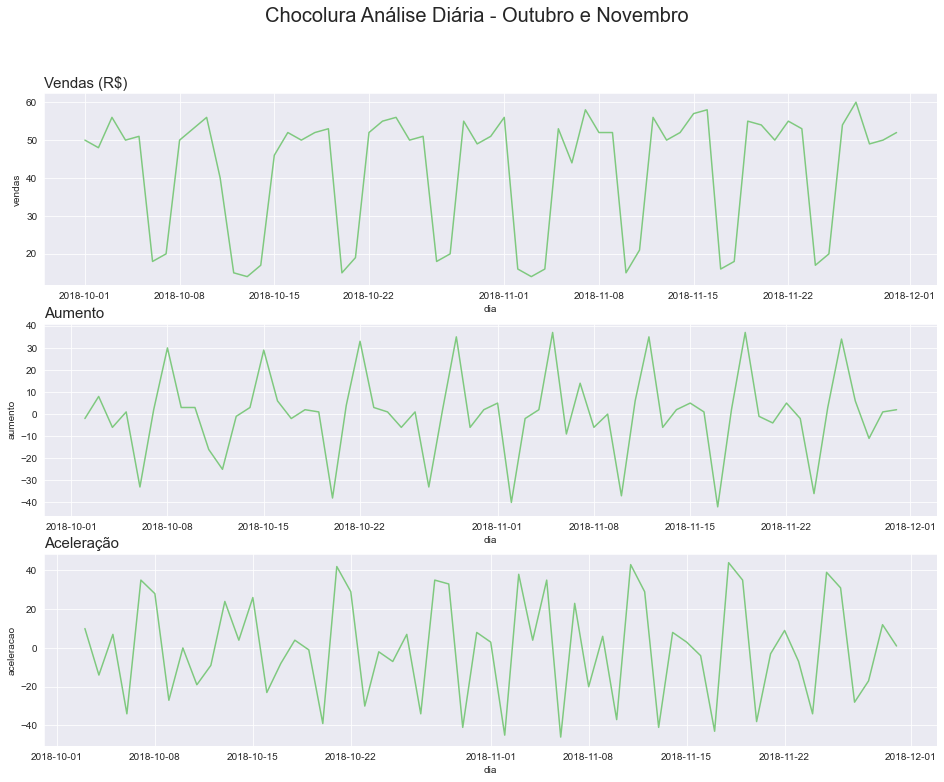

In [39]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Chocolura Análise Diária - Outubro e Novembro', 'Vendas (R$)', 'Aumento', 'Aceleração')

Visualizamos outro padrão sazional nesses gráficos.

**Analizando a sazionalidade**

In [42]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [45]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


### Agrupando os dias

In [59]:
colunas = ['vendas', 'aumento', 'aceleracao']
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana', sort=False)[colunas].mean().round()

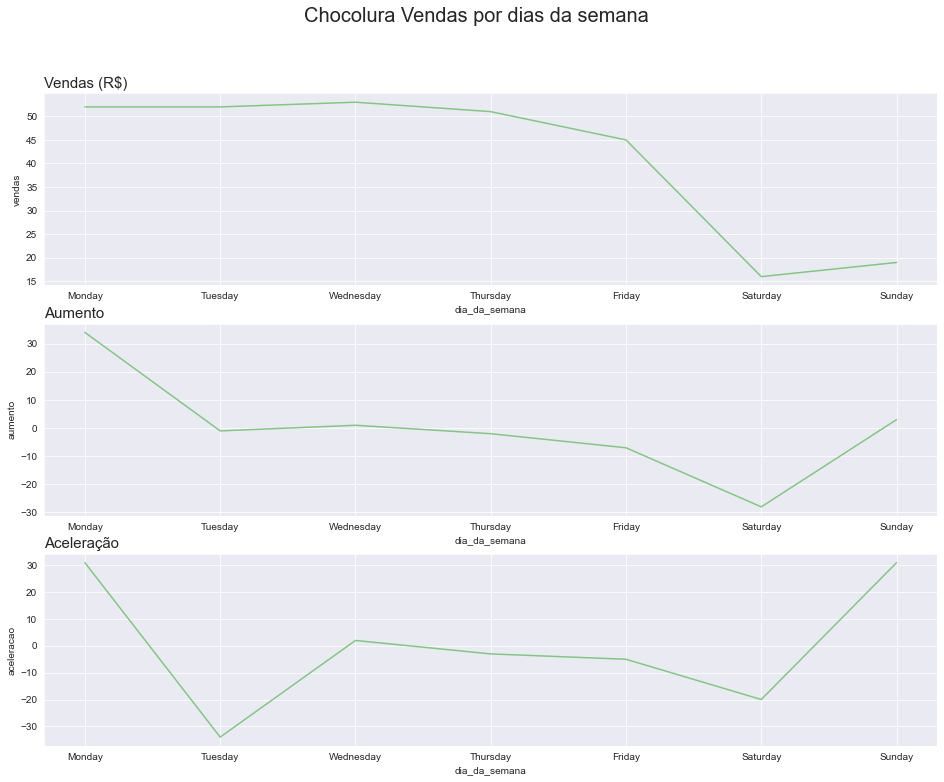

In [62]:
plot_comparacao('dia_da_semana', 'vendas', 'aumento', 'aceleracao', vendas_agrupadas, 'Chocolura Vendas por dias da semana', 'Vendas (R$)', 'Aumento', 'Aceleração')

**Correlação das vendas diárias**

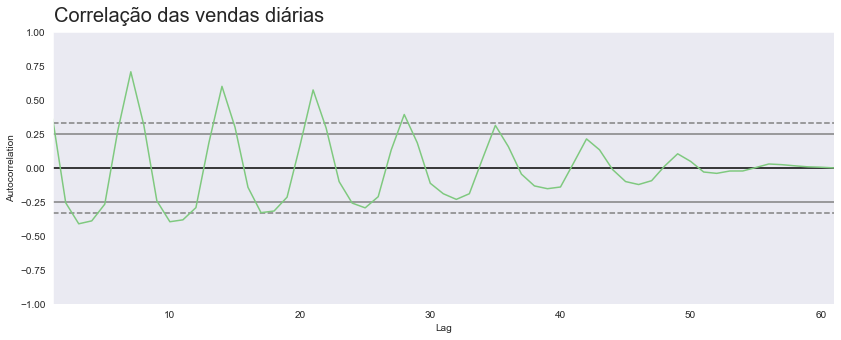

In [78]:
ax = plt.figure(figsize=(14,5))
ax.suptitle('Correlação das vendas diárias', fontsize=20, x=0.26, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

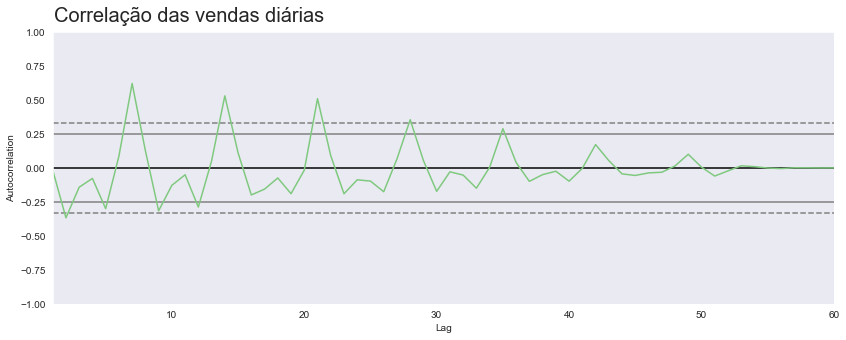

In [77]:
ax = plt.figure(figsize=(14,5))
ax.suptitle('Correlação das vendas diárias', fontsize=20, x=0.26, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

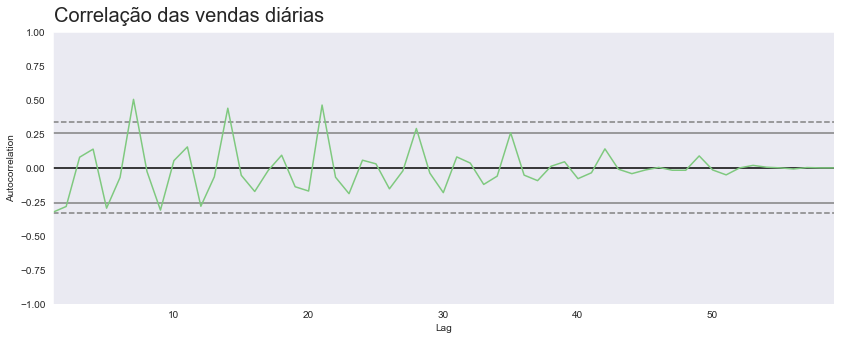

In [76]:
ax = plt.figure(figsize=(14,5))
ax.suptitle('Correlação das vendas diárias', fontsize=20, x=0.26, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análise de vendas

In [81]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [82]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [84]:
print(cafelura.shape)
print(cafelura.isna().sum().sum())

(24, 2)
0


O dataset possuí 24 linhas e 2 colunas e não possuí nenhum dado nulo

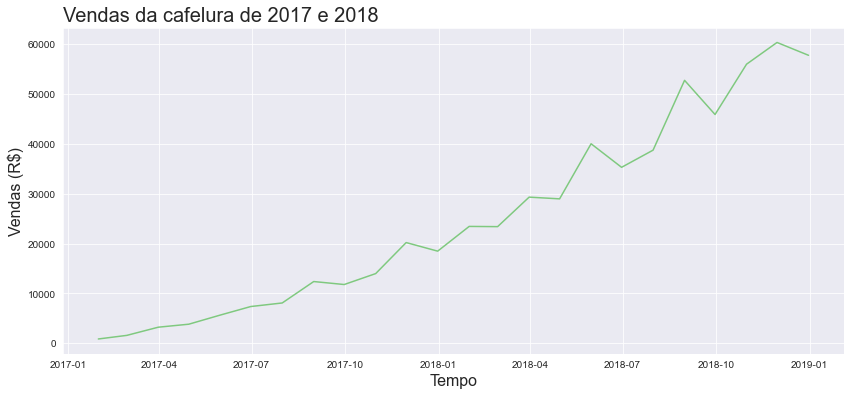

In [85]:
plotar('Vendas da cafelura de 2017 à 2019', 'Tempo', 'Vendas (R$)', 'mes', 'vendas', cafelura)

In [90]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [91]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [92]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values

In [93]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


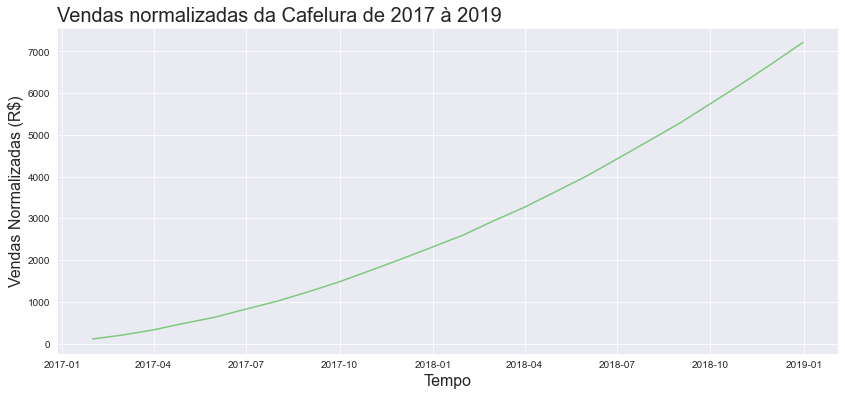

In [94]:
plotar('Vendas normalizadas da Cafelura de 2017 à 2019', 'Tempo', 'Vendas Normalizadas (R$)', 'mes', 'vendas_normalizadas', cafelura)

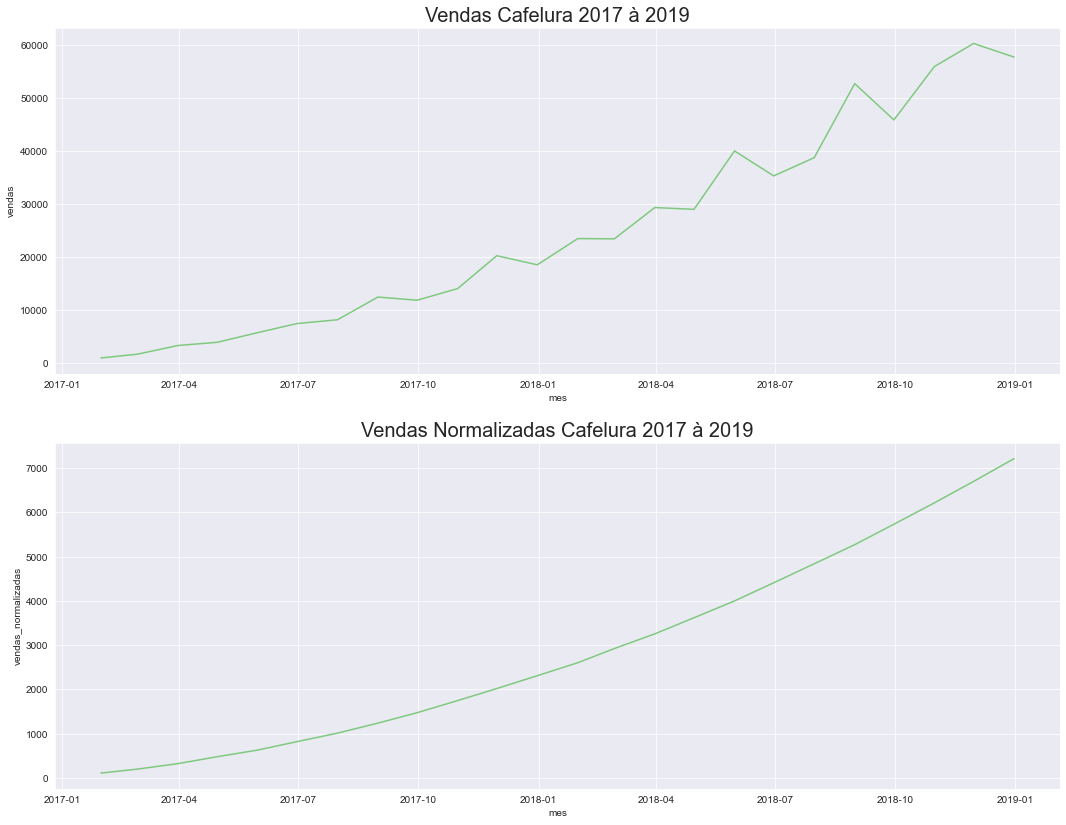

In [96]:
plt.figure(figsize=(18, 14))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 à 2019', fontsize=20)
sns.lineplot(x='mes', y='vendas', data=cafelura)

ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 à 2019', fontsize=20)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)

ax = ax

# Statsmodels

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose

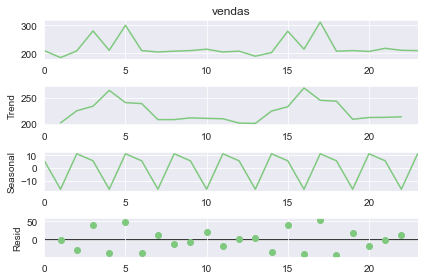

In [137]:
resultado = seasonal_decompose(chocolura['vendas'],  period=3)
ax = resultado.plot()

In [138]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [139]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)

In [140]:
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


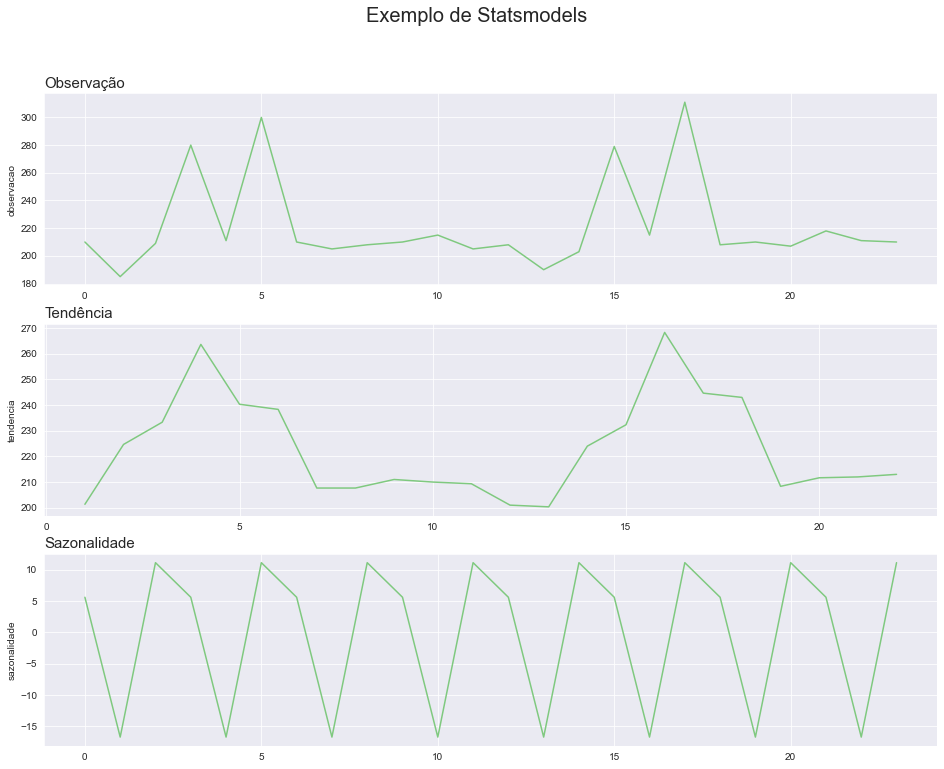

In [141]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels', 'Observação', 'Tendência', 'Sazonalidade')

# Alucel - Análise de vendas

In [142]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [143]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [144]:
alucel['dia'] = pd.to_datetime(alucel.dia)

In [145]:
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [146]:
print(alucel.shape)
print(alucel.isna().sum().sum())

(61, 2)
0


Esse dataset possuí 61 linhas e 2 colunas e não possuí nenhum dado nulo.

In [147]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


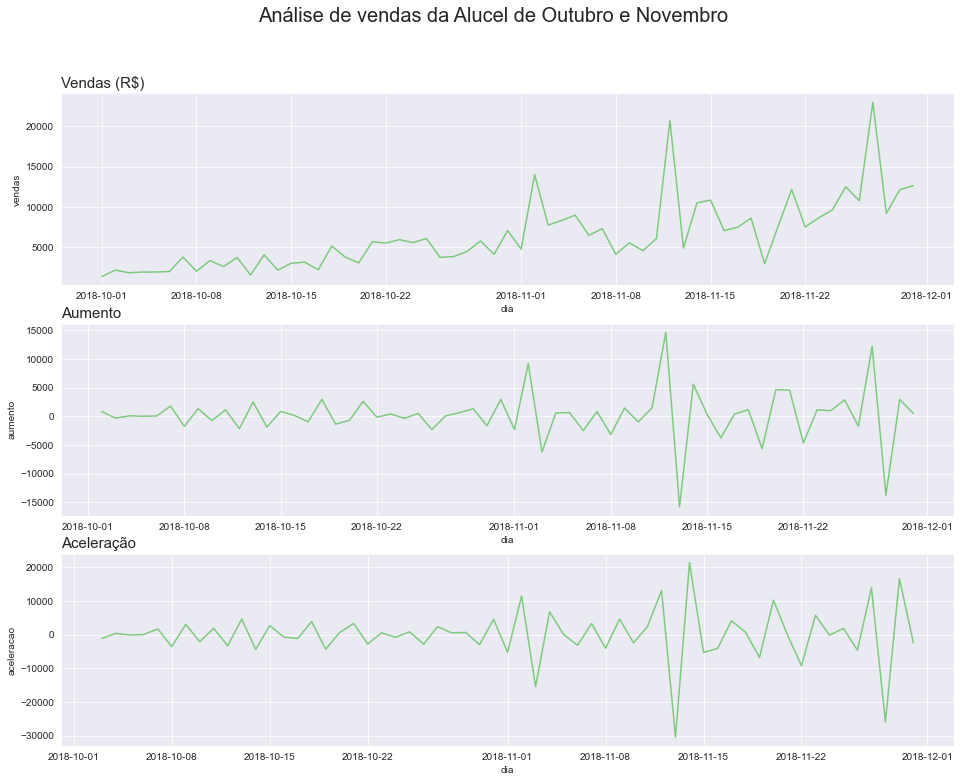

In [148]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro', 'Vendas (R$)', 'Aumento', 'Aceleração')

**Média Móvel**

In [166]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [169]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

In [170]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN


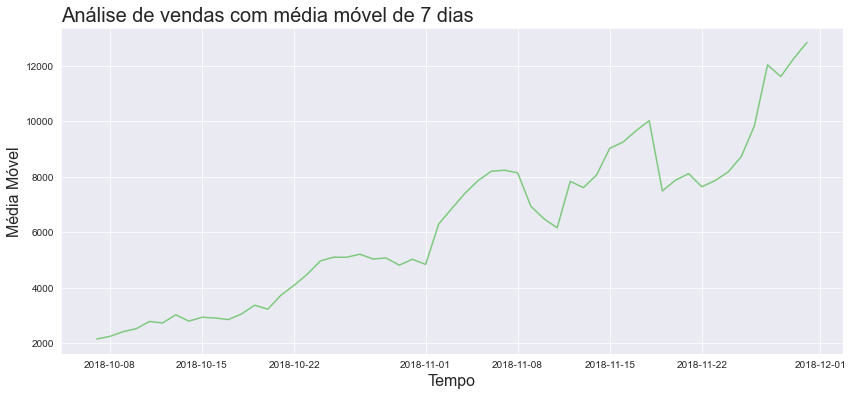

In [168]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

Conseguimos fazer uma boa análise utilizando a média móvel de 7 dias.

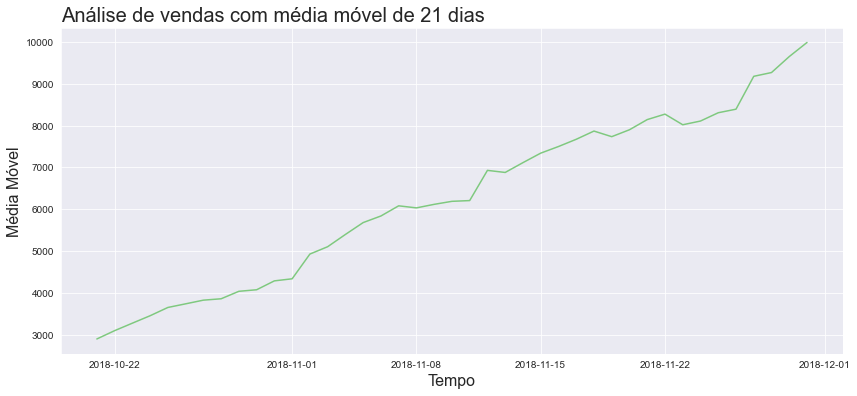

In [171]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

Perdemos muita informação por utilizar uma quantidade muito alto de dias para a média móvel

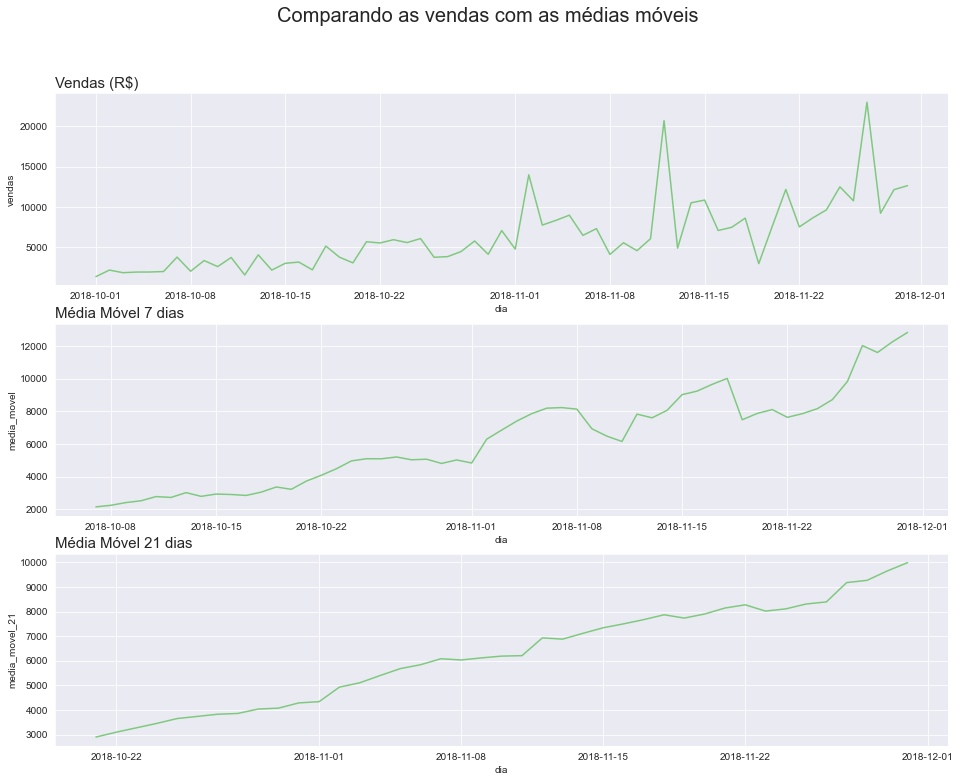

In [173]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com as médias móveis', 'Vendas (R$)', 'Média Móvel 7 dias', 'Média Móvel 21 dias')

Aqui podemos comparar os três gráficos e observarmos isso com mais clareza.